In [26]:
import abtem
from ase.io import read
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 1200x400 with 2 Axes>,
 <AxesSubplot: title={'center': 'Side view'}, xlabel='x [Å]', ylabel='z [Å]'>)

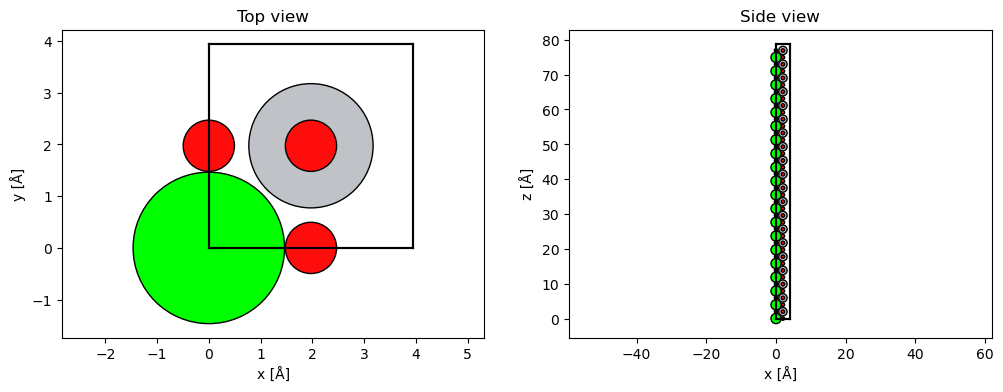

In [77]:
atoms = read('data/SrTiO3.cif')

atoms *= (1, 1, 20)
#toms.center()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

abtem.show_atoms(atoms, ax=ax1, title='Top view')
abtem.show_atoms(atoms, ax=ax2, plane='xz', title='Side view')

In [78]:
from abtem.core.transform import EnsembleTransform
from abtem.distributions import _validate_distribution

class PhaseShift(EnsembleTransform):
    
    def __init__(self, shift):
        self._shift = _validate_distribution(shift)
        super().__init__(distributions=("shift",))
    
    @property
    def ensemble_axes_metadata(self):
        return []
    
    @property
    def shift(self):
        return self._shift
    
    def apply(self, x):
        new_array = x.array * np.exp(1.j * self._shift)
        return self._pack_array(x, new_array)
        
    

In [85]:
potential = abtem.Potential(atoms, slice_thickness=1, sampling=0.05, exit_planes=1, projection="finite")

plane_wave = abtem.PlaneWave(energy=100e3, extent=10, gpts=256)

shift = PhaseShift(np.pi)

plane_wave = plane_wave.insert_transform(shift)

#plane_wave.build().compute().array

In [86]:
exit_waves = plane_wave.multislice(potential).compute()

[########################################] | 100% Completed | 2.28 ss


In [87]:
images = exit_waves.complex_images()

In [48]:
#plt.imshow(images.array[:,0], cmap="hsv")

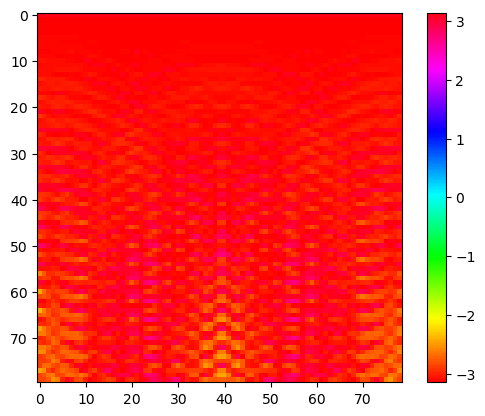

In [88]:
plt.imshow(np.angle(images.array[:,20]), cmap="hsv", vmin=-np.pi, vmax=np.pi)
plt.colorbar()